In [1]:
%matplotlib widget

In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import re
from tqdm import tqdm
import matplotlib.pyplot as plt
import tensorflow as tf

import torch
from scipy import sparse

In [3]:
# %config InlineBackend.figure_format='retina'

In [4]:
data_path = '/Users/maxperozek/ML-CP341/7/youtube_comments.csv'
df = pd.read_csv(data_path)

In [5]:
df

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1
...,...,...,...,...,...
1951,_2viQ_Qnc6-bMSjqyL1NKj57ROicCSJV5SwTrw-RFFA,Katie Mettam,2013-07-13T13:27:39.441000,I love this song because we sing it at Camp al...,0
1952,_2viQ_Qnc6-pY-1yR6K2FhmC5i48-WuNx5CumlHLDAI,Sabina Pearson-Smith,2013-07-13T13:14:30.021000,I love this song for two reasons: 1.it is abou...,0
1953,_2viQ_Qnc6_k_n_Bse9zVhJP8tJReZpo8uM2uZfnzDs,jeffrey jules,2013-07-13T12:09:31.188000,wow,0
1954,_2viQ_Qnc6_yBt8UGMWyg3vh0PulTqcqyQtdE7d4Fl0,Aishlin Maciel,2013-07-13T11:17:52.308000,Shakira u are so wiredo,0


In [6]:
comments = np.array(df['CONTENT'], dtype=str)

In [7]:
y = np.array(df['CLASS'].to_numpy())

In [8]:
np.unique(y)

array([0, 1])

In [9]:
def process_line(line):
    line = re.sub(r'[^a-zA-Z ]+', '', line).lower()
    return line

In [10]:
for i in range(comments.shape[0]):
    comments[i] = process_line(comments[i])

In [11]:
stopword_path = '/Users/maxperozek/ML-CP341/6/stopwords.txt'
stopwords = np.loadtxt(stopword_path, dtype=str)

In [12]:
corpus = ''
for i in range(comments.shape[0]):
    corpus += comments[i] + ' '

In [13]:
def get_freqs(corpus):
    word_list = corpus.split(' ')
    word_list = np.unique(np.array(word_list, dtype=str))
    
    freq_dict = {}
    pbar = tqdm(total=word_list.shape[0] , position=0, leave=True)
    for i in range(word_list.shape[0]):
        freq_dict[word_list[i]] = corpus.count(word_list[i])
        pbar.update(1)
    return freq_dict

In [14]:
# unique list of words with:
# stopwords removed

def get_wordlist(corpus, stopwords, freq_dict, min_freq, max_freq):
    word_list = corpus.split(' ')
    word_list = np.unique(np.array(word_list, dtype=str))
    
    remove = []
    for i in range(word_list.shape[0]):
        if str(word_list[i]) in stopwords:
            remove.append(i)
        elif freq_dict[word_list[i]] >= max_freq or freq_dict[word_list[i]] <= min_freq:
            remove.append(i)
                    
    mask = np.ones(len(word_list), dtype=bool)
    mask[remove] = False

    return remove, word_list[mask]

In [15]:
word_freqs = get_freqs(corpus)

100%|███████████████████████████████████████████████████████████████████████████████████████| 4037/4037 [00:00<00:00, 8631.50it/s]


In [16]:
word_freqs

{'': 166136,
 'a': 9369,
 'aaaaaaa': 2,
 'abbastfuck': 1,
 'ablaze': 1,
 'able': 23,
 'abominable': 1,
 'abomination': 2,
 'abonner': 1,
 'about': 40,
 'above': 2,
 'absolute': 7,
 'absolutely': 6,
 'absorbing': 1,
 'abuse': 3,
 'abusedmistreated': 1,
 'abuses': 1,
 'abusive': 2,
 'abusue': 1,
 'acaer': 1,
 'acceptance': 1,
 'access': 3,
 'accessories': 1,
 'accidental': 1,
 'accomplished': 1,
 'account': 12,
 'accounts': 2,
 'achieve': 2,
 'achieved': 1,
 'acidic': 1,
 'acoustic': 2,
 'acquire': 1,
 'acquiring': 1,
 'across': 1,
 'act': 37,
 'acting': 3,
 'activates': 1,
 'active': 4,
 'actor': 3,
 'actors': 1,
 'actresses': 1,
 'actual': 11,
 'actually': 10,
 'ad': 293,
 'adam': 6,
 'adapt': 1,
 'add': 16,
 'addfollow': 1,
 'addicting': 1,
 'adding': 3,
 'addition': 1,
 'adele': 2,
 'adfly': 7,
 'adhoc': 1,
 'admirable': 1,
 'admire': 1,
 'admit': 2,
 'admitting': 1,
 'adore': 1,
 'adoult': 1,
 'adsense': 1,
 'adult': 1,
 'advance': 3,
 'advertise': 19,
 'advertisements': 8,
 'advert

In [17]:
counts = np.array(list(word_freqs.values()))

In [18]:
counts.mean()

96.69729997522913

In [19]:
counts.std()

2665.1108800568522

In [20]:
hist_vals = np.histogram(counts, bins=[1,10,20,30,40,50,100])

In [21]:
%matplotlib inline

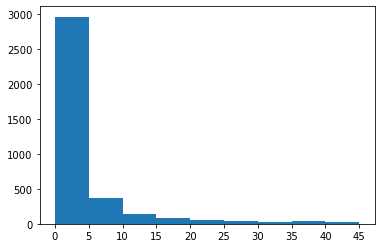

In [22]:
bins = np.arange(0,50,5)
plt.hist(counts, bins=bins)
plt.xticks(bins)
plt.show()

In [23]:
remove, word_list = get_wordlist(corpus, stopwords ,freq_dict=word_freqs, min_freq=5, max_freq=counts.mean() + counts.std())

In [24]:
len(remove)

3186

In [25]:
word_list.shape[0]

851

In [26]:
def build_idf_dict(word_list, documents):
    total_docs = len(documents)
    idf_dict = {}
    
    pbar = tqdm(total=word_list.shape[0] * len(documents) , position=0, leave=True)
    for w in word_list:
        
        docs_with_w = 0
        for doc in documents:
            if w in doc:
                docs_with_w += 1
            pbar.update(1)
        idf_dict[w] = np.log((total_docs/docs_with_w))
            
    pbar.close()
    return idf_dict

In [27]:
idf_dict = build_idf_dict(word_list, comments)

100%|███████████████████████████████████████████████████████████████████████████████| 1664556/1664556 [00:06<00:00, 254885.78it/s]


In [28]:
idf_dict

{'able': 4.53413441287134,
 'absolute': 5.63274670153945,
 'absolutely': 5.786897381366708,
 'account': 5.1807615777963925,
 'act': 4.052296325978602,
 'actual': 5.1807615777963925,
 'actually': 5.276071757600717,
 'ad': 2.2080188224671,
 'adam': 5.786897381366708,
 'add': 5.276071757600717,
 'adfly': 5.969218938160663,
 'advertise': 4.634217871428322,
 'advertisements': 5.499215308914927,
 'africa': 5.276071757600717,
 'age': 3.4042695806991254,
 'ago': 4.745443506538547,
 'agree': 5.786897381366708,
 'ah': 3.9150952044651164,
 'aid': 4.634217871428322,
 'air': 4.582924577040772,
 'aka': 4.745443506538547,
 'al': 1.622819481129932,
 'almost': 5.093750200806762,
 'already': 5.276071757600717,
 'also': 4.177459468932607,
 'always': 5.381432273258543,
 'amazing': 4.939599520979504,
 'amazon': 5.786897381366708,
 'america': 5.381432273258543,
 'american': 5.786897381366708,
 'amp': 3.43552212420323,
 'ampi': 5.63274670153945,
 'ana': 4.582924577040772,
 'animal': 5.381432273258543,
 'anim

In [29]:
def build_tf_idf(word_list, documents, idf_dict):
    N = len(documents)
    f = len(word_list)
    
    X = np.zeros((N,f))
    
    pbar = tqdm(total=N*f , position=0, leave=True)
    for i in range(N):
        
        for j in range(f):
            tf = documents[i].count(word_list[j])
            X[i,j] = tf * idf_dict[word_list[j]]
            pbar.update(1)
    
    pbar.close()
    return X
    

In [30]:
X = build_tf_idf(word_list, comments, idf_dict)

100%|███████████████████████████████████████████████████████████████████████████████| 1664556/1664556 [00:13<00:00, 125280.37it/s]


In [31]:
X.shape

(1956, 851)

In [32]:
sX = sparse.csr_matrix(X)

In [33]:
sX

<1956x851 sparse matrix of type '<class 'numpy.float64'>'
	with 44770 stored elements in Compressed Sparse Row format>

In [34]:
44770/ (1956 * 851)

0.026896061171868053

### Auto Encoder with 2 Nodes

In [35]:
num_hidden_nodes = 2

In [36]:
# ***** Question: Why does using sigmoid activation fuck this up so very badly?

In [37]:
def build_auto_encoder_trainer(X, num_hidden_nodes):
    model = Sequential()
    model.add(Dense(num_hidden_nodes, input_dim=X.shape[1], activation='relu'))
    model.add(Dense(X.shape[1], activation='leaky_relu'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    return model

In [38]:
auto_encoder = build_auto_encoder_trainer(X, num_hidden_nodes)

2022-05-04 15:04:45.723665: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [39]:
auto_encoder.fit(X, X, epochs=100, batch_size=10)

Epoch 1/100
196/196 [==============================] - 1s 1ms/step - loss: 0.5110 - accuracy: 0.0000e+00
Epoch 2/100
196/196 [==============================] - 0s 1ms/step - loss: 0.4840 - accuracy: 0.0015
Epoch 3/100
196/196 [==============================] - 0s 1ms/step - loss: 0.4792 - accuracy: 0.0020
Epoch 4/100
196/196 [==============================] - 0s 1ms/step - loss: 0.4737 - accuracy: 0.0020
Epoch 5/100
196/196 [==============================] - 0s 1ms/step - loss: 0.4698 - accuracy: 0.0020
Epoch 6/100
196/196 [==============================] - 0s 1ms/step - loss: 0.4669 - accuracy: 0.0041
Epoch 7/100
196/196 [==============================] - 0s 1ms/step - loss: 0.4631 - accuracy: 0.0056
Epoch 8/100
196/196 [==============================] - 0s 1ms/step - loss: 0.4595 - accuracy: 0.0061
Epoch 9/100
196/196 [==============================] - 0s 1ms/step - loss: 0.4555 - accuracy: 0.0056
Epoch 10/100
196/196 [==============================] - 0s 1ms/step - loss: 0.4517 - ac

In [40]:
def build_encoder(X, model, num_hidden_nodes):    
    model2 = Sequential()
    model2.add(Dense(num_hidden_nodes, input_dim=X.shape[1],
                weights=model.layers[0].get_weights(), activation='sigmoid'))
    model2.compile(loss='mean_squared_error', optimizer='adam')
    return model2

In [41]:
encoder = build_encoder(X, auto_encoder, num_hidden_nodes)

In [42]:
activations = encoder.predict(X)

In [43]:
activations.shape

(1956, 2)

In [44]:
spam = activations[y.astype(bool)]

In [45]:
not_spam = activations[np.invert(y.astype(bool))]

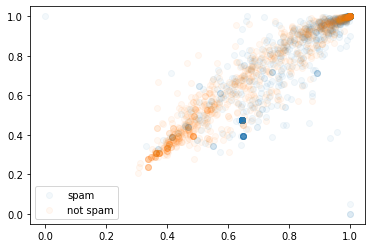

In [46]:
plt.scatter(spam[:,0], spam[:,1], alpha=0.05, label='spam')
plt.scatter(not_spam[:,0], not_spam[:,1], alpha=0.05, label='not spam')

plt.legend()
plt.show()

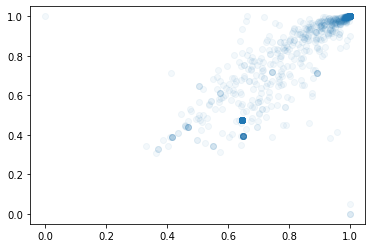

In [47]:
plt.scatter(spam[:,0], spam[:,1], alpha=0.05, label='spam')

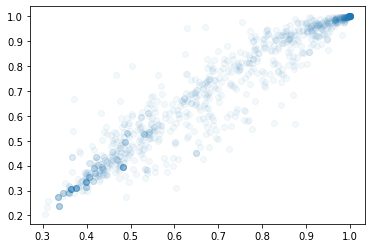

In [48]:
plt.scatter(not_spam[:,0], not_spam[:,1], alpha=0.05, label='not spam')

### Auto Encoder with 3 Nodes

In [49]:
from mpl_toolkits import mplot3d

In [50]:
num_hidden_nodes = 3

In [51]:
# ***** Question: Why does using sigmoid activation fuck this up so very badly?

In [52]:
def build_auto_encoder_trainer(X, num_hidden_nodes):
    model = Sequential()
    model.add(Dense(num_hidden_nodes, input_dim=X.shape[1], activation='relu'))
    model.add(Dense(X.shape[1], activation='leaky_relu'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    return model

In [53]:
auto_encoder = build_auto_encoder_trainer(X, num_hidden_nodes)

In [54]:
auto_encoder.fit(X, X, epochs=100, batch_size=10)

Epoch 1/100
196/196 [==============================] - 0s 1ms/step - loss: 0.5042 - accuracy: 0.0000e+00
Epoch 2/100
196/196 [==============================] - 0s 1ms/step - loss: 0.4834 - accuracy: 0.0010
Epoch 3/100
196/196 [==============================] - 0s 1ms/step - loss: 0.4778 - accuracy: 0.0010
Epoch 4/100
196/196 [==============================] - 0s 1ms/step - loss: 0.4709 - accuracy: 0.0015
Epoch 5/100
196/196 [==============================] - 0s 1ms/step - loss: 0.4638 - accuracy: 0.0020
Epoch 6/100
196/196 [==============================] - 0s 1ms/step - loss: 0.4577 - accuracy: 0.0020
Epoch 7/100
196/196 [==============================] - 0s 1ms/step - loss: 0.4516 - accuracy: 0.0041
Epoch 8/100
196/196 [==============================] - 0s 1ms/step - loss: 0.4455 - accuracy: 0.0031
Epoch 9/100
196/196 [==============================] - 0s 1ms/step - loss: 0.4410 - accuracy: 0.0031
Epoch 10/100
196/196 [==============================] - 0s 1ms/step - loss: 0.4358 - ac

In [55]:
def build_encoder(X, model, num_hidden_nodes):    
    model2 = Sequential()
    model2.add(Dense(num_hidden_nodes, input_dim=X.shape[1],
                weights=model.layers[0].get_weights(), activation='sigmoid'))
    model2.compile(loss='mean_squared_error', optimizer='adam')
    return model2

In [56]:
encoder = build_encoder(X, auto_encoder, num_hidden_nodes)

In [57]:
activations = encoder.predict(X)

In [58]:
activations.shape

(1956, 3)

In [59]:
spam = activations[y.astype(bool)]

In [60]:
not_spam = activations[np.invert(y.astype(bool))]

In [61]:
%matplotlib widget

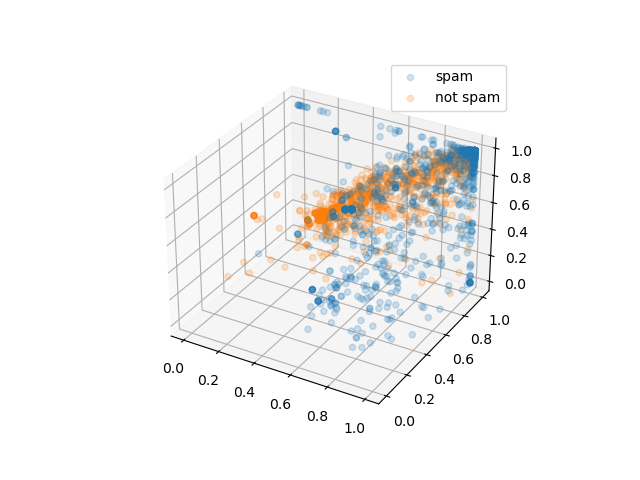

In [62]:
ax = plt.axes(projection='3d')
ax.scatter3D(spam[:,0], spam[:,1], spam[:,2], alpha=0.2, label='spam')
ax.scatter3D(not_spam[:,0], not_spam[:,1], not_spam[:,2], alpha=0.2, label='not spam')
ax.legend()
plt.show()

### More complex auto encoder

In [63]:
%matplotlib inline

In [64]:
num_hidden_nodes = 2

In [65]:
def build_auto_encoder_pyramid(X, num_hidden_nodes):
    int_layer = 100
    
    model = Sequential()
    
    # Input/ compress
    model.add(Dense(int_layer, input_dim=X.shape[1], activation='leaky_relu'))
    
    # Bottleneck
    model.add(Dense(num_hidden_nodes, activation='leaky_relu'))
    
    # Rebuild
    model.add(Dense(int_layer, activation='leaky_relu'))
    model.add(Dense(X.shape[1], activation='relu'))
    
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    return model

In [68]:
model = build_auto_encoder_pyramid(X, num_hidden_nodes)

In [69]:
model.fit(X, X, epochs=500, batch_size=10)

Epoch 1/500
196/196 [==============================] - 1s 2ms/step - loss: 0.5174 - accuracy: 5.1125e-04
Epoch 2/500
196/196 [==============================] - 0s 2ms/step - loss: 0.4943 - accuracy: 0.0026
Epoch 3/500
196/196 [==============================] - 0s 2ms/step - loss: 0.4872 - accuracy: 0.0046
Epoch 4/500
196/196 [==============================] - 0s 2ms/step - loss: 0.4855 - accuracy: 0.0072
Epoch 5/500
196/196 [==============================] - 0s 2ms/step - loss: 0.4814 - accuracy: 0.0087
Epoch 6/500
196/196 [==============================] - 0s 2ms/step - loss: 0.4781 - accuracy: 0.0077
Epoch 7/500
196/196 [==============================] - 0s 2ms/step - loss: 0.4759 - accuracy: 0.0077
Epoch 8/500
196/196 [==============================] - 0s 1ms/step - loss: 0.4718 - accuracy: 0.0092
Epoch 9/500
196/196 [==============================] - 0s 1ms/step - loss: 0.4725 - accuracy: 0.0123
Epoch 10/500
196/196 [==============================] - 0s 2ms/step - loss: 0.4705 - ac

In [70]:
def build_decoder_pyramid(X, model, num_hidden_nodes):    
    model2 = Sequential()
    model2.add(Dense(100, input_dim=X.shape[1], weights=model.layers[0].get_weights(), activation='leaky_relu'))
    model2.add(Dense(num_hidden_nodes, activation='leaky_relu'))
    model2.compile(loss='mean_squared_error', optimizer='adam')
    return model2

In [72]:
decoder = build_decoder_pyramid(X, model, num_hidden_nodes)

In [73]:
activations = decoder.predict(X)

In [74]:
activations.shape

(1956, 2)

In [75]:
spam = activations[y.astype(bool)]
not_spam = activations[np.invert(y.astype(bool))]

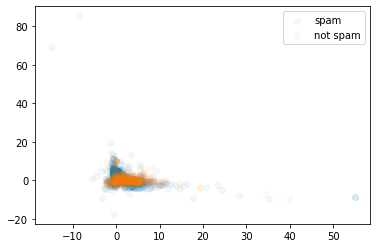

In [76]:
plt.scatter(spam[:,0], spam[:,1], alpha=0.05, label='spam')
plt.scatter(not_spam[:,0], not_spam[:,1], alpha=0.05, label='not spam')

plt.legend()
plt.show()

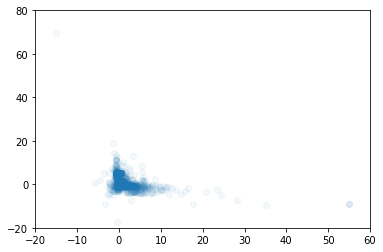

In [89]:
plt.scatter(spam[:,0], spam[:,1], alpha=0.05, label='spam')
plt.xlim(-20,60)
plt.ylim(-20,80)
plt.show()

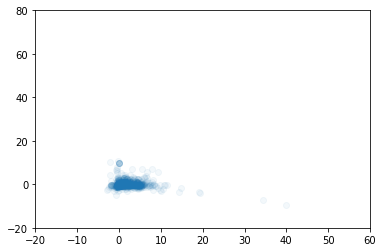

In [90]:
plt.scatter(not_spam[:,0], not_spam[:,1], alpha=0.05, label='not spam')
plt.xlim(-20,60)
plt.ylim(-20,80)
plt.show()